In [1]:
%pip install pandas
%pip install matplotlib
%pip install seaborn


[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.

[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.

[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [25]:
df = pd.read_csv("compas-scores-two-years-violent.csv", index_col=0)

In [5]:
y = df["two_year_recid"]
X = df.drop(columns=["two_year_recid", "decile_score", "score_text"])

In [6]:
df.head()

,name,first,last,compas_screening_date,sex,dob,age,age_cat,race,juv_fel_count,...,v_score_text,v_screening_date,in_custody,out_custody,priors_count.1,start,end,event,two_year_recid,two_year_recid.1
id,,,,,,,,,,,,,,,,,,,,,
1,miguel hernandez,miguel,hernandez,2013-08-14,Male,1947-04-18,69,Greater than 45,Other,0,...,Low,2013-08-14,2014-07-07,2014-07-14,0,0,327,0,0,0
3,kevon dixon,kevon,dixon,2013-01-27,Male,1982-01-22,34,25 - 45,African-American,0,...,Low,2013-01-27,2013-01-26,2013-02-05,0,9,159,1,1,1
5,marcu brown,marcu,brown,2013-01-13,Male,1993-01-21,23,Less than 25,African-American,0,...,Medium,2013-01-13,NaN,NaN,1,0,1174,0,0,0
6,bouthy pierrelouis,bouthy,pierrelouis,2013-03-26,Male,1973-01-22,43,25 - 45,Other,0,...,Low,2013-03-26,NaN,NaN,2,0,1102,0,0,0
7,marsha miles,marsha,miles,2013-11-30,Male,1971-08-22,44,25 - 45,Other,0,...,Low,2013-11-30,2013-11-30,2013-12-01,0,1,853,0,0,0


In [7]:
df.describe()

,age,juv_fel_count,decile_score,juv_misd_count,juv_other_count,priors_count,days_b_screening_arrest,c_days_from_compas,is_recid,r_days_from_arrest,violent_recid,is_violent_recid,decile_score.1,v_decile_score,priors_count.1,start,end,event,two_year_recid,two_year_recid.1
count,4743.000000,4743.000000,4743.000000,4743.000000,4743.000000,4743.000000,4475.000000,4732.000000,4743.000000,690.000000,0.0,4743.000000,4743.000000,4743.000000,4743.000000,4743.000000,4743.000000,4743.000000,4743.000000,4743.000000
mean,36.002952,0.045330,3.978073,0.070841,0.080751,2.677209,2.723799,72.691251,0.209783,8.918841,NaN,0.172676,3.978073,3.338815,2.677209,9.084124,730.143369,0.165507,0.163399,0.163399
std,12.200715,0.420694,2.749706,0.406142,0.468779,4.084277,78.074361,385.694476,0.407196,40.179739,NaN,0.378006,2.749706,2.415791,4.084277,36.867544,365.435158,0.371677,0.369768,0.369768
min,18.000000,0.000000,-1.000000,0.000000,0.000000,0.000000,-345.000000,0.000000,0.000000,-1.000000,NaN,0.000000,-1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
25%,26.000000,0.000000,1.000000,0.000000,0.000000,0.000000,-1.000000,1.000000,0.000000,0.000000,NaN,0.000000,1.000000,1.000000,0.000000,0.000000,422.500000,0.000000,0.000000,0.000000
50%,33.000000,0.000000,3.000000,0.000000,0.000000,1.000000,-1.000000,1.000000,0.000000,0.000000,NaN,0.000000,3.000000,3.000000,1.000000,0.000000,837.000000,0.000000,0.000000,0.000000
75%,44.000000,0.000000,6.000000,0.000000,0.000000,3.000000,-1.000000,2.000000,0.000000,0.000000,NaN,0.000000,6.000000,5.000000,3.000000,1.000000,1039.000000,0.000000,0.000000,0.000000
max,83.000000,20.000000,10.000000,8.000000,17.000000,38.000000,1057.000000,9485.000000,1.000000,596.000000,NaN,1.000000,10.000000,10.000000,38.000000,672.000000,1186.000000,1.000000,1.000000,1.000000


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4743 entries, 1 to 11000
Data columns (total 53 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   name                     4743 non-null   object 
 1   first                    4743 non-null   object 
 2   last                     4743 non-null   object 
 3   compas_screening_date    4743 non-null   object 
 4   sex                      4743 non-null   object 
 5   dob                      4743 non-null   object 
 6   age                      4743 non-null   int64  
 7   age_cat                  4743 non-null   object 
 8   race                     4743 non-null   object 
 9   juv_fel_count            4743 non-null   int64  
 10  decile_score             4743 non-null   int64  
 11  juv_misd_count           4743 non-null   int64  
 12  juv_other_count          4743 non-null   int64  
 13  priors_count             4743 non-null   int64  
 14  days_b_screening_arrest  447

In [26]:
nan_counts = df.isna().sum()
print(nan_counts[nan_counts > 0])

days_b_screening_arrest     268
c_jail_in                   268
c_jail_out                  268
c_case_number                11
c_offense_date              771
c_arrest_date              3983
c_days_from_compas           11
c_charge_desc                17
r_case_number              3748
r_charge_degree            3748
r_days_from_arrest         4053
r_offense_date             3748
r_charge_desc              3771
r_jail_in                  4053
r_jail_out                 4053
violent_recid              4743
vr_case_number             3924
vr_charge_degree           3924
vr_offense_date            3924
vr_charge_desc             3924
score_text                    5
in_custody                  209
out_custody                 209
dtype: int64


In [27]:
categorical_features = ['sex', 'age_cat','race']
quantitative_features = ['age', 'juv_fel_count', 'juv_misd_count', 'juv_other_count', 'priors_count', 'days_b_screening_arrest', 'decile_score', 'is_recid', 'c_charge_degree']
ordinal_features = ['age_cat', 'c_charge_degree']

X = df[categorical_features + quantitative_features].values
X_quantitative = df[quantitative_features].values
X_categorical = df[categorical_features].values

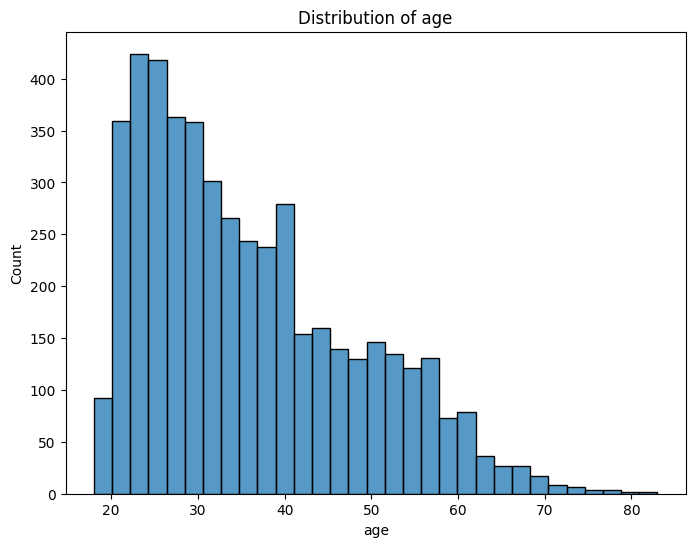

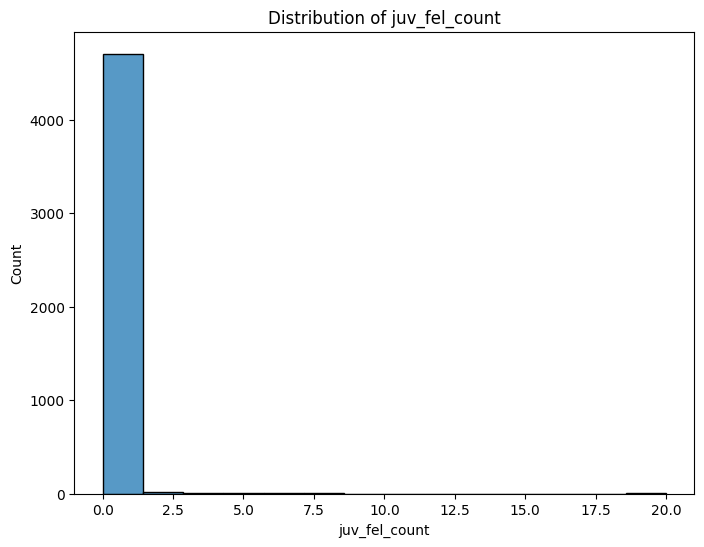

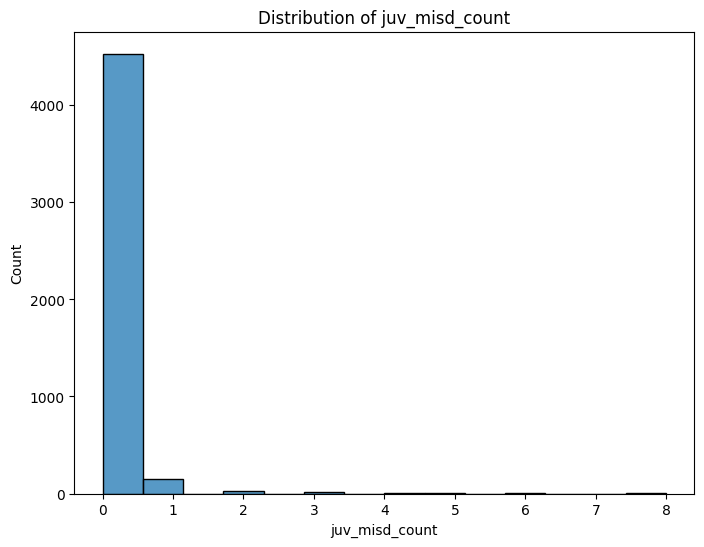

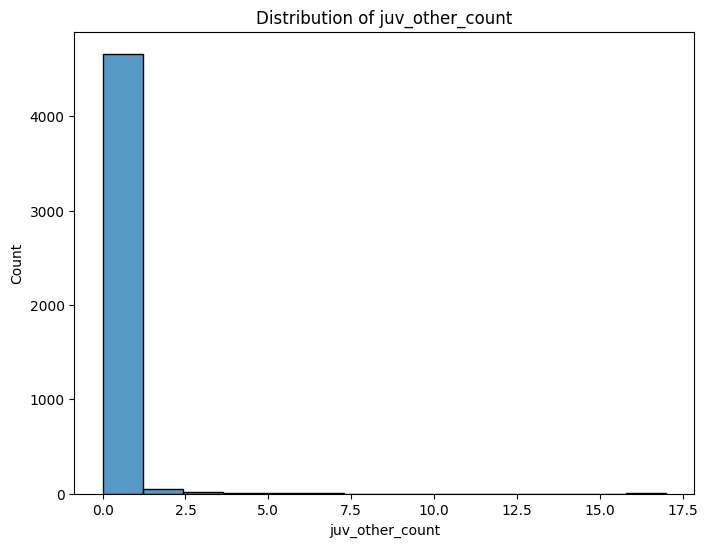

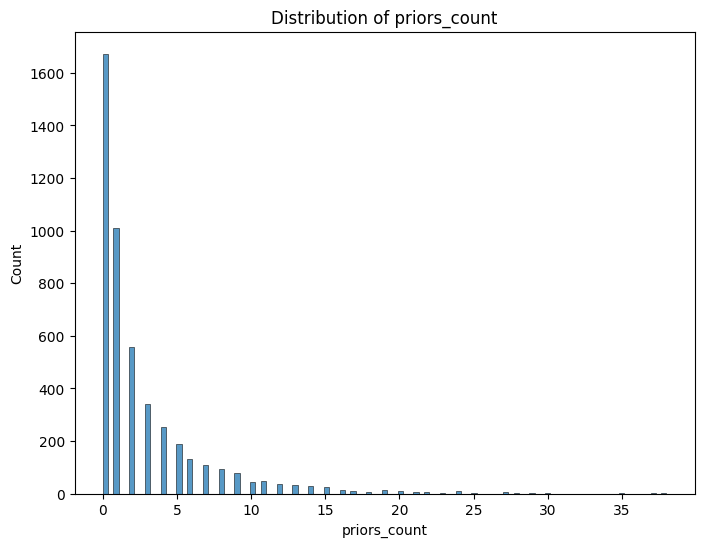

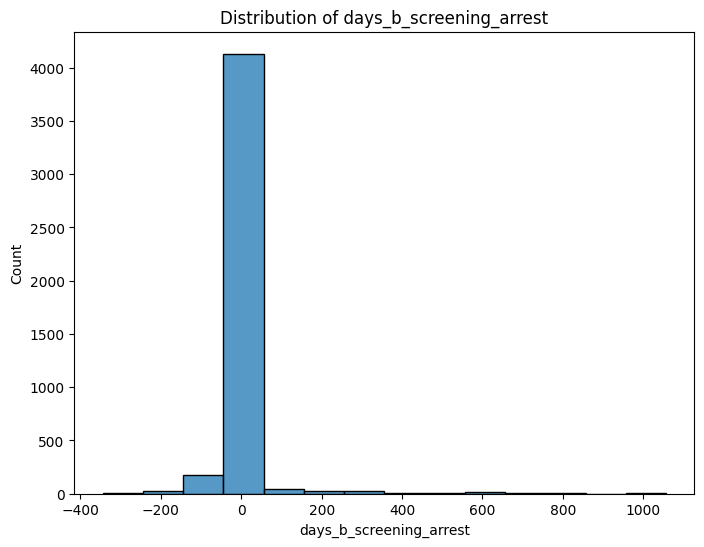

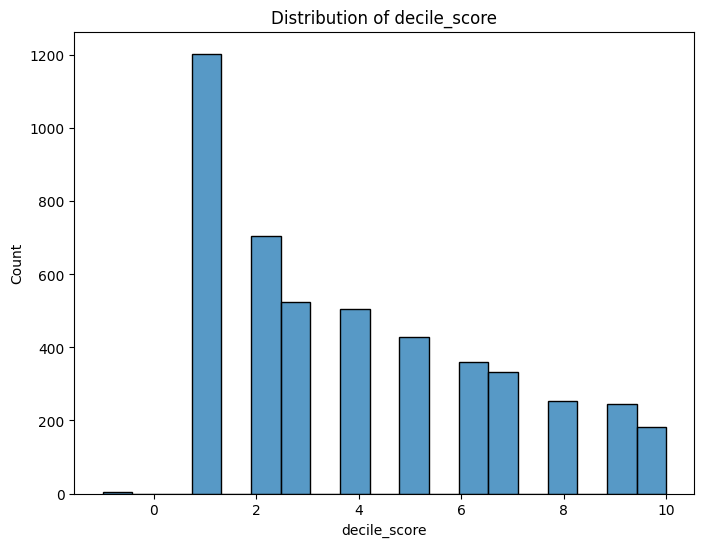

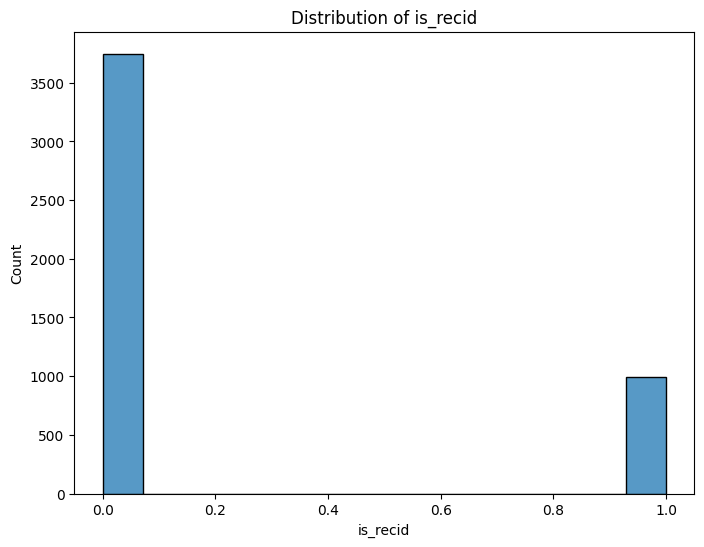

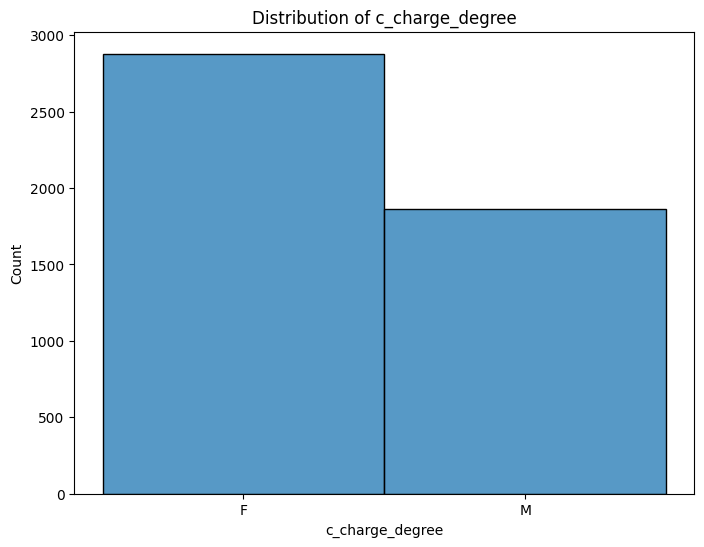

In [28]:
for i, col in enumerate(df[quantitative_features].columns):
    plt.figure(figsize=(8, 6))
    sns.histplot(data=df[quantitative_features],x=col)
    plt.title(f"Distribution of {col}")
    plt.savefig(f"figures/histogram_{col}.png")
    plt.show()

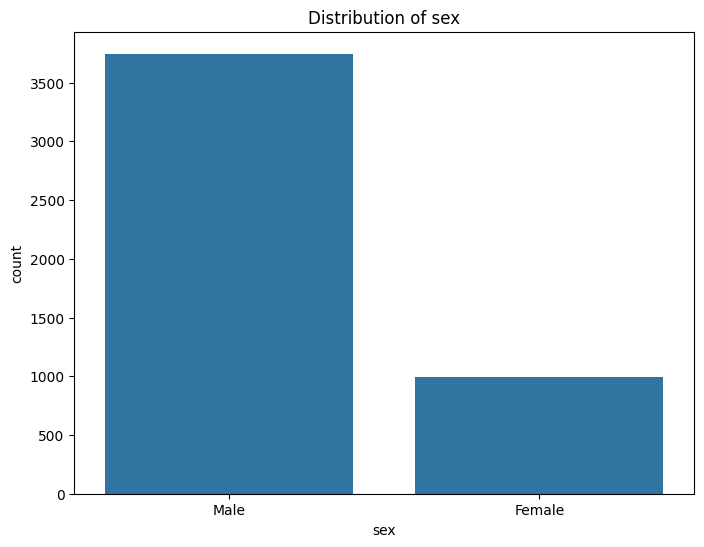

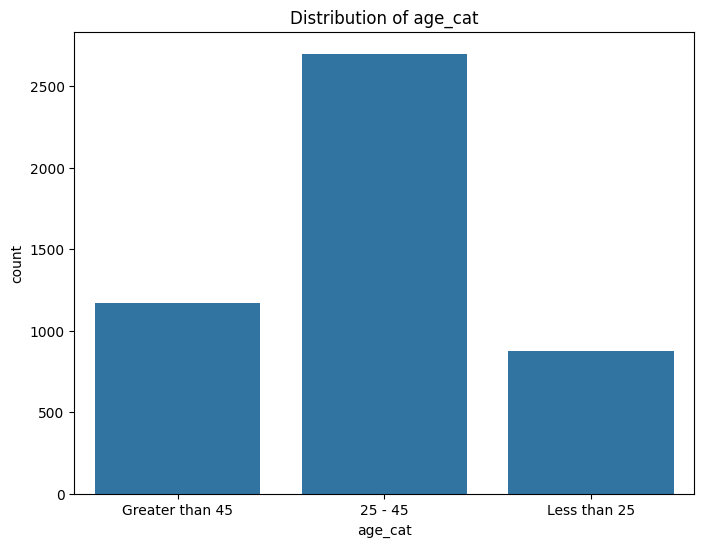

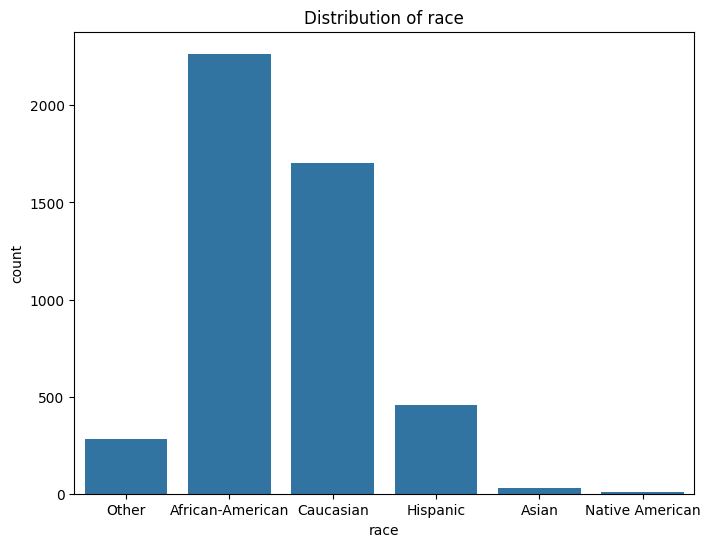

In [13]:
for i, col in enumerate(df[categorical_features].columns):
    plt.figure(figsize=(8, 6))
    sns.countplot(data=df[categorical_features],x=col)
    plt.title(f"Distribution of {col}")
    plt.savefig(f"figures/countplot_{col}.png")
    plt.show()

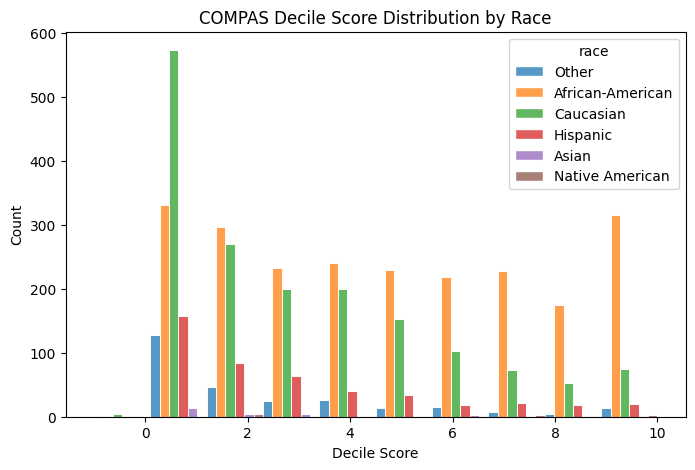

In [29]:
plt.figure(figsize=(8,5))
sns.histplot(
    data=df,
    x="decile_score",
    hue="race",
    multiple="dodge",
    bins=10,
    edgecolor="w"
)
plt.title("COMPAS Decile Score Distribution by Race")
plt.xlabel("Decile Score")
plt.ylabel("Count")
plt.show()

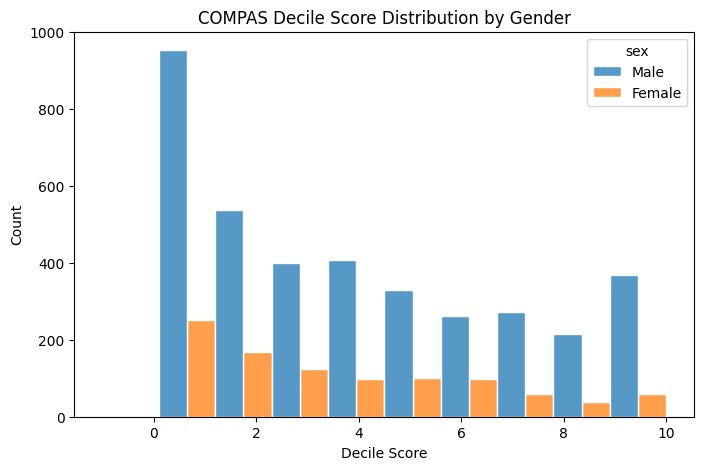

In [30]:
plt.figure(figsize=(8,5))
sns.histplot(
    data=df,
    x="decile_score",
    hue="sex",
    multiple="dodge",
    bins=10,
    edgecolor="w"
)
plt.title("COMPAS Decile Score Distribution by Gender")
plt.xlabel("Decile Score")
plt.ylabel("Count")
plt.show()

In [ ]:
# count and percentage of re-arrested (value == 1)
num_rererrested = recid_counts.get(1, 0)
print(f"Number of people re-arrested within two years:  {num_rererrested}")



recid_pct = df['two_year_recid'].value_counts(normalize=True).sort_index() * 100
print(recid_pct)

print(f"{num_rererrested} people ({recid_pct.loc[1]:.1f}%) were re-arrested within two years.")


Number of people re-arrested within two years:  775
two_year_recid
0    83.660131
1    16.339869
Name: proportion, dtype: float64
775 people (16.3%) were re-arrested within two years.


16.3% of the total population (775 people) were re-arrested within two years and the other 83% were not!

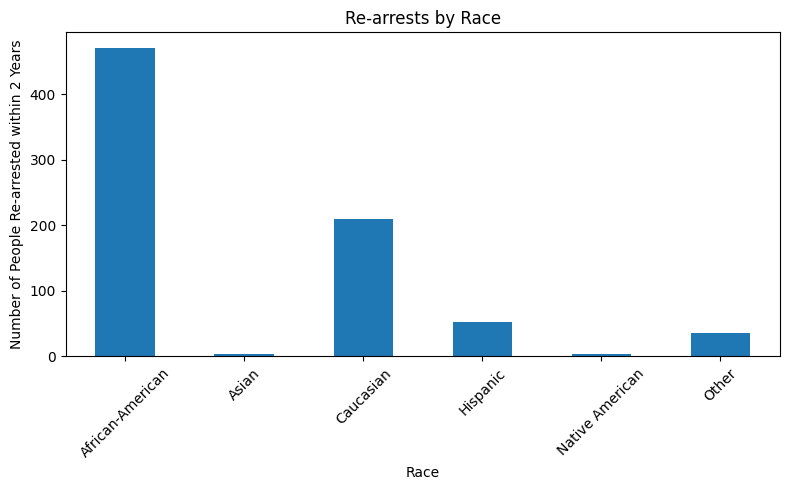

In [ ]:
# Compute counts of re-arrested by race
rearrest_counts = df[df['two_year_recid'] == 1].groupby('race').size()

plt.figure(figsize=(8, 5))
rearrest_counts.plot(kind='bar')
plt.xlabel('Race')
plt.ylabel('Number of People Re-arrested within 2 Years')
plt.title('Re-arrests by Race')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

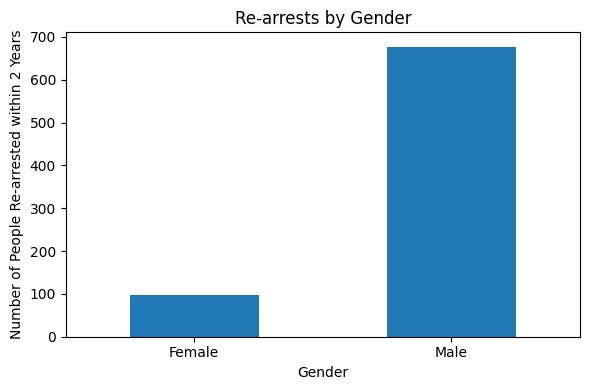

In [ ]:
# Count re-arrests by gender
rearrest_by_gender = df[df['two_year_recid'] == 1].groupby('sex').size()

plt.figure(figsize=(6, 4))
rearrest_by_gender.plot(kind='bar')
plt.xlabel('Gender')
plt.ylabel('Number of People Re-arrested within 2 Years')
plt.title('Re-arrests by Gender')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

In [42]:
from sklearn.metrics import confusion_matrix, classification_report


# binary prediction from COMPAS score_text
#    Low → 0 (predict no recidivism), Medium/High → 1 (predict recidivism)
df['compas_pred'] = (df['score_text'] != 'Low').astype(int)

#overall accuracy
accuracy = (df['compas_pred'] == df['two_year_recid']).mean()
print(f"COMPAS prediction accuracy: {accuracy:.3f} ({accuracy*100:.1f}%)")

# confusion matrix

cm = confusion_matrix(df['two_year_recid'], df['compas_pred'])
print("Confusion Matrix:\n", cm)


COMPAS prediction accuracy: 0.674 (67.4%)
Confusion Matrix:
 [[2681 1287]
 [ 258  517]]


67.4% of the time, the COMPAS risk category (Low vs Medium/High) correctly matches whether someone actually recidivated within two years.

True Negatives (TN): 2,681 people did not recidivate and COMPAS correctly scored them “Low.”

False Positives (FP): 1,287 people did not recidivate but COMPAS scored them “Medium/High.”

False Negatives (FN): 258 people did recidivate but COMPAS scored them “Low.”

True Positives (TP): 517 people did recidivate and COMPAS correctly scored them “Medium/High.”
